<a href="https://colab.research.google.com/github/chancun2019/SVM-Machin-Learning/blob/main/Skripsi_4_Pemrosesan_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud

## Load Dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd 'drive/My Drive/Colab Notebooks/Output1'

/content/drive/My Drive/Colab Notebooks/Output1


In [4]:
# Membaca dataset dari file CSV
dataset = pd.read_csv("dataset+labeling.csv")
jumlah_dataset = len(dataset)

# Menggantikan nilai NaN dengan string kosong
dataset['tweet'].fillna('', inplace=True)

# Memisahkan teks dan label dari dataset
tweets = dataset['tweet']
labels = dataset['InSet']

## TF-IDF dengan sklearn

In [5]:
# Inisialisasi objek TfidfVectorizer
vectorizer = TfidfVectorizer()

# Melakukan vektorisasi teks
X = vectorizer.fit_transform(dataset['tweet'])

# Mendapatkan daftar kata
kata = vectorizer.get_feature_names_out()

# Membuat DataFrame hasil TF-IDF
tfidf_df = pd.DataFrame(X.toarray(), columns=kata)

In [6]:
# Menginisialisasi variabel untuk menyimpan hasil akurasi dan confusion matrix
best_accuracy = 0.0
best_confusion_matrix = None

### hasil tf, idf, tf-idf

In [7]:
# Menampilkan kolom kata, kolom TF, kolom IDF, dan kolom TF-IDF untuk lima kata teratas
top10_kata = tfidf_df.sum().sort_values(ascending=False).head(10).index

print("Kolom Kata, Kolom TF, Kolom IDF, dan Kolom TF-IDF untuk sepuluh kata teratas:")
print("Kata\t\tTF\tIDF\tTF-IDF")
for kata in top10_kata:
    tf = tfidf_df[kata].sum()
    idf = vectorizer.idf_[vectorizer.vocabulary_[kata]]
    tfidf = tf * idf
    print(f"{kata}\t{tf:.3f}\t{idf:.3f}\t{tfidf:.3f}")

Kolom Kata, Kolom TF, Kolom IDF, dan Kolom TF-IDF untuk sepuluh kata teratas:
Kata		TF	IDF	TF-IDF
vaksin	70.011	1.028	72.005
yg	21.407	3.030	64.854
aku	17.866	3.405	60.834
mau	14.776	3.523	52.051
solo	14.394	3.827	55.091
booster	13.792	3.844	53.020
aja	12.307	3.642	44.822
info	12.267	4.098	50.270
ga	11.691	3.794	44.352
covid	11.354	3.746	42.532


## Split data training & data testing

In [8]:
# Memisahkan data menjadi data latih dan data uji dengan perbandingan 60:40
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, labels, test_size=0.4, random_state=0)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, labels, test_size=0.3, random_state=0)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X, labels, test_size=0.2, random_state=0)
X_train9, X_test9, y_train9, y_test9 = train_test_split(X, labels, test_size=0.1, random_state=0)

# Menampilkan jumlah data latih dan data uji
print("Jumlah data latih:", X_train6.shape[0],",", X_train7.shape[0],",", X_train8.shape[0],",", X_train9.shape[0])
print("Jumlah data uji:", X_test6.shape[0],",",X_test7.shape[0],",",X_test8.shape[0],",",X_test9.shape[0])
print("Total data :", jumlah_dataset)

Jumlah data latih: 597 , 697 , 796 , 896
Jumlah data uji: 399 , 299 , 200 , 100
Total data : 996


## Training SVM

#### Percobaan dengan perbandingan 90:10

In [9]:
# Splitting the dataset into training and testing data
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(dataset['tweet'], dataset['InSet'], test_size=0.1, random_state=0)

# Creating DataFrame for training data
datatrain = pd.DataFrame()
datatrain['tweet'] = train_X
datatrain['InSet'] = train_Y

# Creating DataFrame for testing data
datatest = pd.DataFrame()
datatest['tweet'] = test_X
datatest['InSet'] = test_Y

# Applying TF-IDF vectorization
tfidf_data = TfidfVectorizer(max_features=5000)
tfidf_data.fit(dataset['tweet'])
train_X_data = tfidf_data.transform(datatrain['tweet'])
test_X_data = tfidf_data.transform(datatest['tweet'])

#print(train_X_data)
#print(test_X_data)

In [10]:
# Klasifikasi SVM
model = SVC(kernel='linear')
model.fit(train_X_data, train_Y)
prediksi = model.predict(test_X_data)

# Menghitung dan menampilkan akurasi
akurasi = accuracy_score(test_Y, prediksi) * 100
print("Akurasi:", akurasi)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(test_Y, prediksi))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_Y, prediksi))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_Y, prediksi))

# Perform k-fold cross-validation
k = 5  # Ubah nilai k sesuai kebutuhan Anda
scores = cross_val_score(model, train_X_data, train_Y, cv=k)

# Print accuracy for each fold
for i, score in enumerate(scores):
    print(f"\nFold-{i+1} Accuracy: {score:.2f}")

# Print average accuracy
average_accuracy = scores.mean()
print(f"\nAverage Accuracy: {average_accuracy:.2f}")

Akurasi: 61.0

Classification Report:
              precision    recall  f1-score   support

         neg       0.65      0.89      0.75        66
         pos       0.22      0.06      0.09        34

    accuracy                           0.61       100
   macro avg       0.44      0.48      0.42       100
weighted avg       0.50      0.61      0.53       100

Confusion Matrix:
[[59  7]
 [32  2]]
Confusion Matrix:
[[59  7]
 [32  2]]

Fold-1 Accuracy: 0.61

Fold-2 Accuracy: 0.62

Fold-3 Accuracy: 0.61

Fold-4 Accuracy: 0.62

Fold-5 Accuracy: 0.62

Average Accuracy: 0.62


#### Percobaan dengan perbandingan 80:20

In [11]:
# Splitting the dataset into training and testing data
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(dataset['tweet'], dataset['InSet'], test_size=0.2, random_state=0)

# Creating DataFrame for training data
datatrain = pd.DataFrame()
datatrain['tweet'] = train_X
datatrain['InSet'] = train_Y

# Creating DataFrame for testing data
datatest = pd.DataFrame()
datatest['tweet'] = test_X
datatest['InSet'] = test_Y

# Applying TF-IDF vectorization
tfidf_data = TfidfVectorizer(max_features=5000)
tfidf_data.fit(dataset['tweet'])
train_X_data = tfidf_data.transform(datatrain['tweet'])
test_X_data = tfidf_data.transform(datatest['tweet'])

print(train_X_data)
print(test_X_data)

  (0, 3881)	0.026868968991428037
  (0, 3826)	0.1059255935973176
  (0, 3682)	0.188401517805085
  (0, 3674)	0.188401517805085
  (0, 3278)	0.12459575217113805
  (0, 3247)	0.1702932039937542
  (0, 2079)	0.14635531521551917
  (0, 2029)	0.3405864079875084
  (0, 2028)	0.1415922056515039
  (0, 1557)	0.12139279414907365
  (0, 1549)	0.188401517805085
  (0, 1430)	0.188401517805085
  (0, 1416)	0.22160021923630827
  (0, 1411)	0.14635531521551917
  (0, 1086)	0.09911417877525058
  (0, 517)	0.10706163234234937
  (0, 209)	0.6811728159750168
  (0, 86)	0.2539447387315246
  (0, 36)	0.09514828091609741
  (1, 3881)	0.07734207930195872
  (1, 3321)	0.4141151061914555
  (1, 2660)	0.4141151061914555
  (1, 2362)	0.5118210858059561
  (1, 1366)	0.3081759207605177
  (1, 1156)	0.5423120304816664
  :	:
  (793, 2081)	0.24555058527424536
  (793, 1773)	0.32238796934313885
  (793, 1364)	0.1809016430594389
  (793, 1360)	0.2896803536970388
  (793, 1101)	0.30611771828656076
  (793, 337)	0.5236751395617605
  (793, 36)	0.1462

In [12]:
# Klasifikasi SVM
model = SVC(kernel='linear')
model.fit(train_X_data, train_Y)
prediksi = model.predict(test_X_data)

# Menghitung dan menampilkan akurasi
akurasi = accuracy_score(test_Y, prediksi) * 100
print("Akurasi:", akurasi)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(test_Y, prediksi))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_Y, prediksi))

# Perform k-fold cross-validation
k = 5  # Ubah nilai k sesuai kebutuhan Anda
scores = cross_val_score(model, train_X_data, train_Y, cv=k)

# Print accuracy for each fold
for i, score in enumerate(scores):
    print(f"\nFold-{i+1} Accuracy: {score:.8f}")

# Print average accuracy
average_accuracy = scores.mean()
print(f"\nAverage Accuracy: {average_accuracy:.8f}")

Akurasi: 63.5

Classification Report:
              precision    recall  f1-score   support

         neg       0.66      0.92      0.77       133
         pos       0.31      0.07      0.12        67

    accuracy                           0.64       200
   macro avg       0.49      0.50      0.45       200
weighted avg       0.55      0.64      0.55       200

Confusion Matrix:
[[122  11]
 [ 62   5]]

Fold-1 Accuracy: 0.60000000

Fold-2 Accuracy: 0.61006289

Fold-3 Accuracy: 0.61006289

Fold-4 Accuracy: 0.61006289

Fold-5 Accuracy: 0.61006289

Average Accuracy: 0.60805031


#### Percobaan dengan perbandingan 70:30

In [13]:
# Splitting the dataset into training and testing data
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(dataset['tweet'], dataset['InSet'], test_size=0.3, random_state=0)

# Creating DataFrame for training data
datatrain = pd.DataFrame()
datatrain['tweet'] = train_X
datatrain['InSet'] = train_Y

# Creating DataFrame for testing data
datatest = pd.DataFrame()
datatest['tweet'] = test_X
datatest['InSet'] = test_Y

# Applying TF-IDF vectorization
tfidf_data = TfidfVectorizer(max_features=5000)
tfidf_data.fit(dataset['tweet'])
train_X_data = tfidf_data.transform(datatrain['tweet'])
test_X_data = tfidf_data.transform(datatest['tweet'])

#print(train_X_data)
#print(test_X_data)

In [14]:
# Klasifikasi SVM
model = SVC(kernel='linear')
model.fit(train_X_data, train_Y)
prediksi = model.predict(test_X_data)

# Menghitung dan menampilkan akurasi
akurasi = accuracy_score(test_Y, prediksi) * 100
print("Akurasi:", akurasi)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(test_Y, prediksi))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_Y, prediksi))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_Y, prediksi))

# Perform k-fold cross-validation
k = 5  # Ubah nilai k sesuai kebutuhan Anda
scores = cross_val_score(model, train_X_data, train_Y, cv=k)

# Print accuracy for each fold
for i, score in enumerate(scores):
    print(f"\nFold-{i+1} Accuracy: {score:.2f}")

# Print average accuracy
average_accuracy = scores.mean()
print(f"\nAverage Accuracy: {average_accuracy:.2f}")

Akurasi: 63.21070234113713

Classification Report:
              precision    recall  f1-score   support

         neg       0.66      0.92      0.77       198
         pos       0.29      0.06      0.10       101

    accuracy                           0.63       299
   macro avg       0.47      0.49      0.43       299
weighted avg       0.53      0.63      0.54       299

Confusion Matrix:
[[183  15]
 [ 95   6]]
Confusion Matrix:
[[183  15]
 [ 95   6]]

Fold-1 Accuracy: 0.64

Fold-2 Accuracy: 0.65

Fold-3 Accuracy: 0.61

Fold-4 Accuracy: 0.63

Fold-5 Accuracy: 0.61

Average Accuracy: 0.63


#### Percobaan dengan perbandingan 60:40

In [15]:
# Splitting the dataset into training and testing data
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(dataset['tweet'], dataset['InSet'], test_size=0.4, random_state=0)

# Creating DataFrame for training data
datatrain = pd.DataFrame()
datatrain['tweet'] = train_X
datatrain['InSet'] = train_Y

# Creating DataFrame for testing data
datatest = pd.DataFrame()
datatest['tweet'] = test_X
datatest['InSet'] = test_Y

# Applying TF-IDF vectorization
tfidf_data = TfidfVectorizer(max_features=5000)
tfidf_data.fit(dataset['tweet'])
train_X_data = tfidf_data.transform(datatrain['tweet'])
test_X_data = tfidf_data.transform(datatest['tweet'])

#print(train_X_data)
#print(test_X_data)

In [16]:
# Klasifikasi SVM
model = SVC(kernel='linear')
model.fit(train_X_data, train_Y)
prediksi = model.predict(test_X_data)

# Menghitung dan menampilkan akurasi
akurasi = accuracy_score(test_Y, prediksi) * 100
print("Akurasi:", akurasi)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(test_Y, prediksi))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_Y, prediksi))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_Y, prediksi))

# Perform k-fold cross-validation
k = 5  # Ubah nilai k sesuai kebutuhan Anda
scores = cross_val_score(model, train_X_data, train_Y, cv=k)

# Print accuracy for each fold
for i, score in enumerate(scores):
    print(f"\nFold-{i+1} Accuracy: {score:.2f}")

# Print average accuracy
average_accuracy = scores.mean()
print(f"\nAverage Accuracy: {average_accuracy:.2f}")

Akurasi: 63.40852130325815

Classification Report:
              precision    recall  f1-score   support

         neg       0.65      0.94      0.77       260
         pos       0.36      0.06      0.11       139

    accuracy                           0.63       399
   macro avg       0.51      0.50      0.44       399
weighted avg       0.55      0.63      0.54       399

Confusion Matrix:
[[244  16]
 [130   9]]
Confusion Matrix:
[[244  16]
 [130   9]]

Fold-1 Accuracy: 0.64

Fold-2 Accuracy: 0.62

Fold-3 Accuracy: 0.64

Fold-4 Accuracy: 0.56

Fold-5 Accuracy: 0.63

Average Accuracy: 0.62


## Visualisasi Data

### visualisasi positif dengan word bar

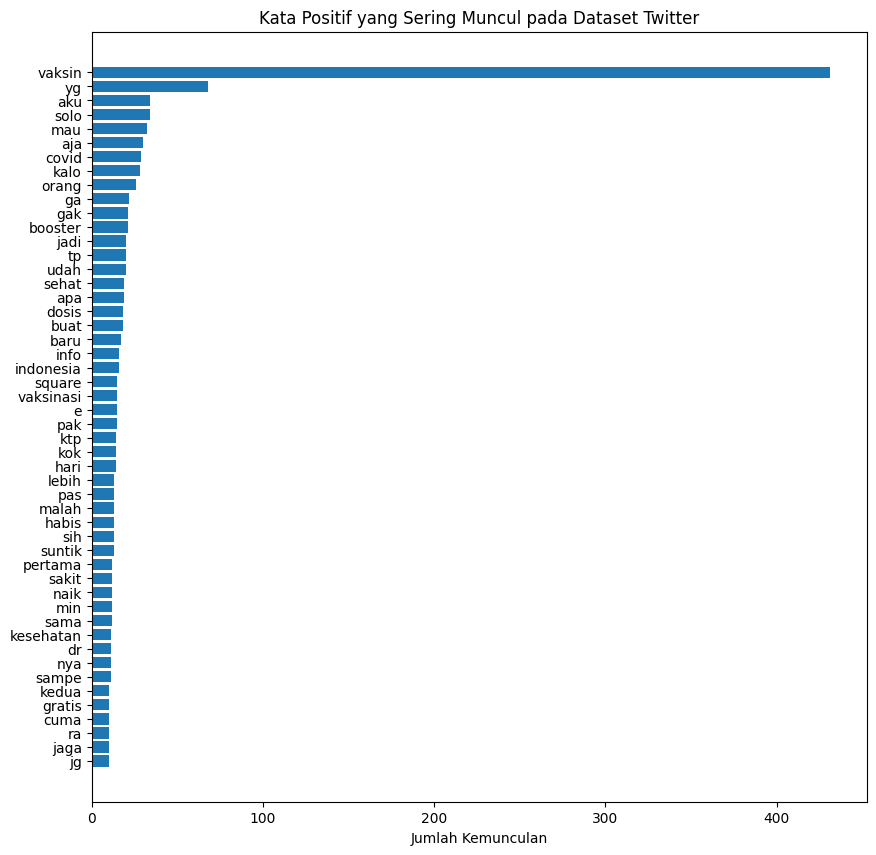

In [17]:
def wordBarGraphFunction_pos(data, title, top_n=50):
    # Mengambil kata-kata dengan sentimen positif
    positive_words = [word.lower() for word in data if word.lower() in top_words]

    # Menghitung jumlah kemunculan kata
    word_count_dict = dict(Counter(positive_words))

    # Mengurutkan kata-kata berdasarkan jumlah kemunculan
    popular_words = sorted(word_count_dict, key=word_count_dict.get, reverse=True)

    # Mengambil n kata dengan kemunculan tertinggi
    popular_words = popular_words[:top_n]

    # Membuat grafik batang
    plt.figure(figsize=(10, 10))
    plt.barh(range(len(popular_words)), [word_count_dict[word] for word in reversed(popular_words)])
    plt.yticks(range(len(popular_words)), reversed(popular_words))
    plt.xlabel('Jumlah Kemunculan')
    plt.title(title)
    plt.show(block=False)

# Penggunaan
positive_data = dataset[dataset['InSet'] == 'pos']['tweet'].str.split().explode().tolist()
word_count_dict = dict(Counter(positive_data))
top_words = sorted(word_count_dict, key=word_count_dict.get, reverse=True)

wordBarGraphFunction_pos(positive_data, 'Kata Positif yang Sering Muncul pada Dataset Twitter', top_n=50)

### visualisasi positif dengan word cloud


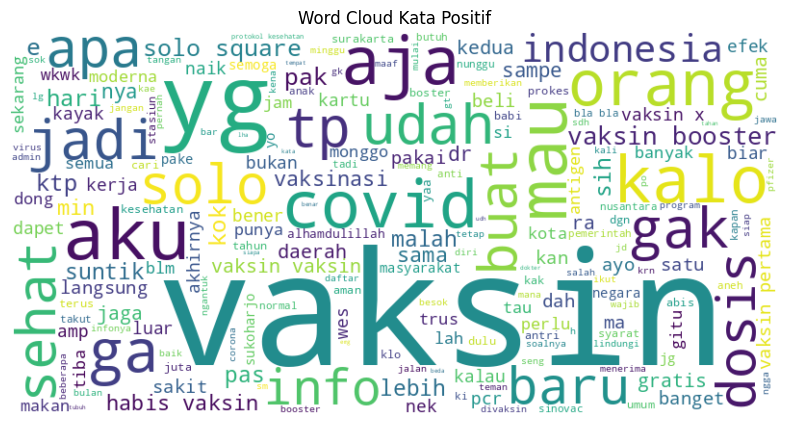

In [18]:
# Mengambil kata-kata dengan sentimen positif
positive_words = dataset[dataset['InSet'] == 'pos']['tweet'].str.split().explode().tolist()

# Menggabungkan kata-kata menjadi satu string
positive_text = ' '.join(positive_words)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Positif')
plt.show()

### visualisasi negatif dengan word bar

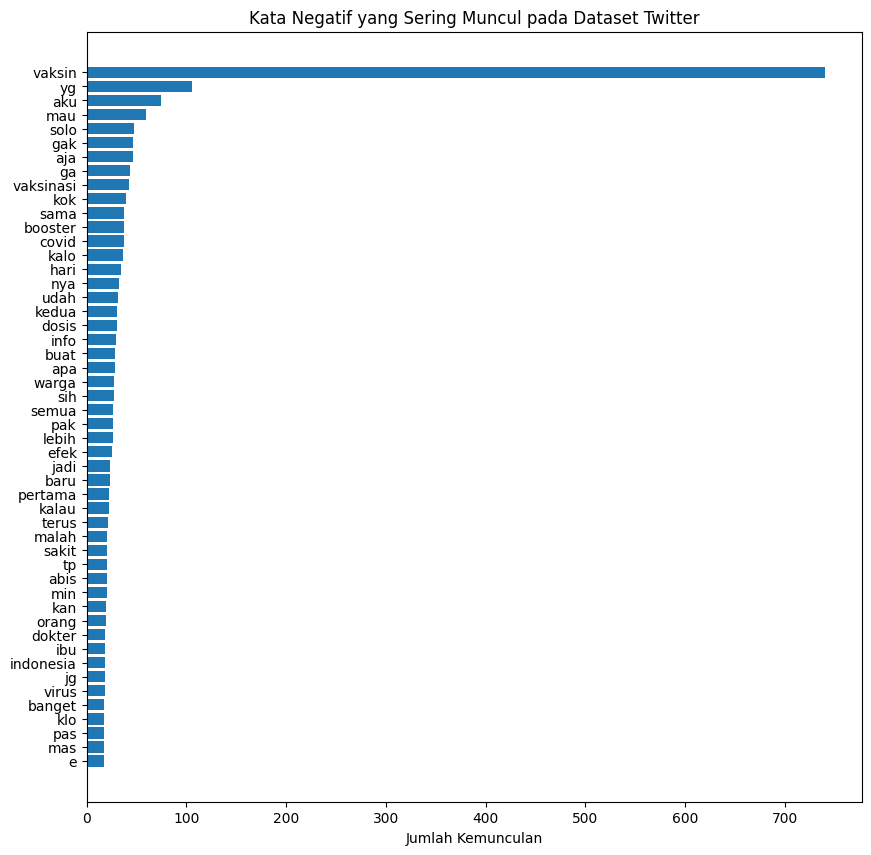

In [19]:
def wordBarGraphFunction_neg(data, title, top_n=50):
    # Mengambil kata-kata dengan sentimen negatif
    negative_words = [word.lower() for word in data if isinstance(word, str) and word.lower() in top_words]

    # Menghitung jumlah kemunculan kata
    word_count_dict = dict(Counter(negative_words))

    # Mengurutkan kata-kata berdasarkan jumlah kemunculan
    popular_words = sorted(word_count_dict, key=word_count_dict.get, reverse=True)

    # Mengambil n kata dengan kemunculan tertinggi
    popular_words = popular_words[:top_n]

    # Membuat grafik batang dengan ukuran yang disesuaikan
    plt.figure(figsize=(10, 10))  # Ubah width dan height sesuai kebutuhan Anda
    plt.barh(range(len(popular_words)), [word_count_dict[word] for word in reversed(popular_words)])
    plt.yticks(range(len(popular_words)), reversed(popular_words))
    plt.xlabel('Jumlah Kemunculan')
    plt.title(title)
    plt.show(block=False)

# Contoh penggunaan
negative_data = dataset[dataset['InSet'] == 'neg']['tweet'].str.split().explode().tolist()
word_count_dict = dict(Counter(negative_data))
top_words = sorted(word_count_dict, key=word_count_dict.get, reverse=True)

wordBarGraphFunction_neg(negative_data, 'Kata Negatif yang Sering Muncul pada Dataset Twitter', top_n=50)


### visualisasi negatif dengan word cloud

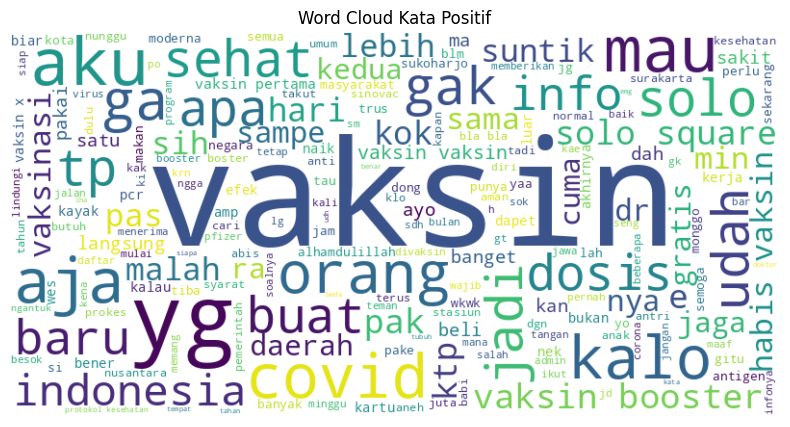

In [20]:
# Mengambil kata-kata dengan sentimen positif
negative_data = dataset[dataset['InSet'] == 'neg']['tweet'].str.split().explode().tolist()

# Menggabungkan kata-kata menjadi satu string
positive_text = ' '.join(positive_words)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Positif')
plt.show()